# k-Means is MF

How good is this algorithm?
Does it converge? Is it just a heuristic or can we derive some quality guarantees of the result?
These questions can all be answered under the more general framework of matrix factorization.

Indicating Clusters by a Binary Matrix
Let $Y\in\{0,1\}^{n\times r}$ such that $Y_{is}=1$ if and only if $i\in\mathcal{C}_s$.

Every point belongs to exactly one cluster if and only if $$|Y_{i\cdot}|=1 \text{ for all } i\in\{1,\ldots,n\},$$

We denote with $\mathbb{1}^{n\times r}$ the set of all binary matrices which indicate a partition of $n$ points into $r$ sets:
$$\mathbb{1}^{n\times r}=\{Y\in\{0,1\}^{n\times r}\vert |Y_{i\cdot}|=1 \text{ for } i\in\{1,\ldots,n\}\}$$

The Centroid Matrix     
Given a cluster indicator matrix $Y\in\mathbb{1}^{n\times r}$, the $s$th centroid is
\begin{align*}
    X_{\cdot s}&=\frac{1}{|\mathcal{C}_s|}\sum_{i\in\mathcal{C}_s}D_{i\cdot}^\top=\frac{1}{\lvert Y_{\cdot s}\rvert}\sum_{i=1}^nY_{is}D_{i\cdot}^\top 
    = \frac{1}{\lvert Y_{\cdot s}\rvert} D^\top Y_{\cdot s}.
\end{align*}
We can compute the matrix $X$ which gathers all centroids column-wise by
\begin{align*}
    X &= D^\top Y 
    \begin{pmatrix}
    \frac{1}{\lvert Y_{\cdot 1}\rvert} & &\mathbf{0}\\
    &\ddots &\\
    \mathbf{0}& & \frac{1}{\lvert Y_{\cdot r}\rvert}
    \end{pmatrix} 
    = D^\top Y (Y^\top Y)^{-1}.
\end{align*}

````{prf:theorem} $k$-means MF objective
The $k$- means objective in Eq.~\eqref{eq:k-means} is equivalent to
\begin{align*}
    \min_Y& RSS(X,Y) = \lVert D-YX^\top\rVert^2
    &\text{s.t. }Y\in\mathbb{1}^{n\times r},\\ 
    &&\quad X=D^\top Y (Y^\top Y)^{-1}
\end{align*}
````
````{toggle}
```{prf:proof}
The matrix $Y$ is a cluster-indicator matrix, indicating a partition of the $n$ data points into $r$ sets. For every data point with index $i\in\{1,\ldots,n\}$, there exists one cluster index $s_i$, such that $Y_{i s_i}=1$ and $Y_{i s}=0$ for $s\neq s_i$ (point $i$ is assigned to cluster $s_i$). Using this notation, the objective function in Eq.~\eqref{eq:kmeansCentroid}, returning the distance of every point to its cluster centroid, is equal to
\begin{align}
    {\color{magenta}\sum_{s=1}^r}\sum_{i\in{\color{magenta}\mathcal{C}_s}}\lVert D_{i\cdot}-{\color{magenta}X_{\cdot s}^\top}\rVert^2 
    &= \sum_{i=1}^n{\color{magenta}\sum_{s=1}^r Y_{is}} \lVert D_{i\cdot}-{\color{magenta}X_{\cdot s}^\top}\rVert^2 &\text{(use indicator matrix)}\nonumber\\
    &= \sum_{i=1}^n \lVert D_{i\cdot}-{\color{magenta}X_{\cdot {s_i}}^\top}\rVert^2&\text{(only $Y_{i s_i}=1$)}\nonumber\\ 
    &= \sum_{i=1}^n \left\lVert D_{i\cdot}-{\color{magenta}\sum_{s=1}^rY_{is}X_{\cdot s}^\top}\right\rVert^2&\text{(only $Y_{i s_i}=1$)}\nonumber\\
    &= \left\lVert D-{\color{magenta}\sum_{s=1}^rY_{\cdot s}X_{\cdot s}^\top}\right\rVert^2\label{eq:FroEuc}\\
    &= \lVert D-YX^\top\rVert^2 &\text{(outer product def. matrix product)}\nonumber.
\end{align}
Eq.~\eqref{eq:FroEuc} uses the composition of the squared Frobenius norm as a sum of the squared Euclidean vector norm over all rows.
```
````
The matrix $Y$ indicates the cluster assignments.
The matrix $X$ gathers the centroids of all clusters column-wise.

::::{grid}
:gutter: 1
:class-container: sd-d-flex-row, sd-align-major-center

:::{grid-item}
:child-align: center
:columns: auto
```{tikz}
\begin{tikzpicture}[baseline=-0.5ex, 
    style1/.style n args={3}{
    minimum width=#1,minimum height=#2,inner sep=0,align=center,fill=#3}
  ]
   \matrix [matrix of math nodes,nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&] (y) {
 |[style1={5mm}{25mm}{black}]|\& \&  \\
 \&  |[style1={5mm}{15mm}{black}]| \&\\
 \&   \& |[style1={5mm}{10mm}{black}]|\\
};
\end{tikzpicture}
```
:::
:::{grid-item}
:child-align: center
:columns: auto
```{tikz}
\begin{tikzpicture}[baseline=-0.5ex,
    style1/.style 2 args={
  matrix of math nodes,
  every node/.append style={minimum width=#2,minimum height=#1,inner sep=0,align=center},
  nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&}
  ]
   \matrix [style1={5mm}{5mm}] (n) {
 |[fill=blue, opacity=0.6]|\& |[fill=blue, opacity=0.8]| \& |[fill=blue, opacity=0.4]| \& |[fill=blue, opacity=0.6]| \& |[fill=blue, opacity=0.8]| \& |[fill=blue, opacity=0.4]|\\
 |[fill=magenta, opacity=0.2]|\& |[fill=magenta, opacity=0.5]| \& |[fill=magenta, opacity=0.2]|\& |[fill=magenta, opacity=0.8]|\& |[fill=magenta, opacity=0.7]|\& |[fill=magenta, opacity=0.8]|\\
 |[fill=orange, opacity=0.7]|\& |[fill=orange, opacity=0.4]| \& |[fill=orange, opacity=0.6]|\& |[fill=orange, opacity=0.9]|\& |[fill=orange, opacity=0.2]|\& |[fill=orange, opacity=0.9]|\\
};
\end{tikzpicture}
```
:::
:::{grid-item}
:child-align: center
:columns: auto
$=$
:::
:::{grid-item}
:child-align: center
:columns: auto    

```{tikz}
\begin{tikzpicture}[baseline=-0.5ex,
    style1/.style n args={3}{
    minimum width=#2,minimum height=#1,inner sep=0,align=center,fill=#3}
  ]
   \matrix [matrix of math nodes,nodes in empty cells,
  left delimiter=(,
  right delimiter=),ampersand replacement=\&] (y) {
  |[style1={25mm}{5mm}{blue}, opacity=0.6]|\& |[style1={25mm}{5mm}{blue}, opacity=0.8]| \& |[style1={25mm}{5mm}{blue}, opacity=0.4]| \& |[style1={25mm}{5mm}{blue}, opacity=0.6]| \& |[style1={25mm}{5mm}{blue}, opacity=0.8]| \& |[style1={25mm}{5mm}{blue}, opacity=0.4]|\\
  |[style1={15mm}{5mm}{magenta}, opacity=0.2]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.5]| \& |[style1={15mm}{5mm}{magenta}, opacity=0.2]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.8]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.7]|\& |[style1={15mm}{5mm}{magenta}, opacity=0.8]|\\
  |[style1={10mm}{5mm}{orange}, opacity=0.7]|\& |[style1={10mm}{5mm}{orange}, opacity=0.4]| \& |[style1={10mm}{5mm}{orange}, opacity=0.6]|\& |[style1={10mm}{5mm}{orange}, opacity=0.9]|\& |[style1={10mm}{5mm}{orange}, opacity=0.2]|\& |[style1={10mm}{5mm}{orange}, opacity=0.9]|\\
};
\end{tikzpicture}
```
:::

::::


````{prf:example} k-means matrix factorization for recommender systems
\begin{align}
  \begin{pmatrix}
    5 & \mu & 1 & 1 \\
    \mu & 1 & 5 & \mu  \\\
    2 & 1 & 5 & 3 \\
    4 & \mu & 4 & 2\\
    5 & 5 & \mu & 1 \\
    \mu & 1 & 5 & 3 \\
  \end{pmatrix}
  &\approx
  \begin{pmatrix}
    1 & 0\\
    0 & 1\\
    0 & 1\\
    1 & 0\\
    1 & 0\\
    0 & 1\\
  \end{pmatrix}
  \begin{pmatrix}
    4.7 & 3.7 & 2.7 & 1.3\\
    2.3 & 1.0 & 5.0 & 3.0\\
  \end{pmatrix}
\end{align}
Every user's preferences are approximated by a linear combination of the rows in the second matrix:
\begin{align}
    \begin{pmatrix}
        5 & \mu & 1 & 1 
    \end{pmatrix}
    \approx&
    1\cdot 
    \begin{pmatrix}
        4.7 & 3.7 & 2.7 & 1.3
    \end{pmatrix}
    +0\cdot
    \begin{pmatrix}
        2.3 & 1.0 & 5.0 & 3.0
    \end{pmatrix}    
\end{align}
To see this, we can use the sklearn implementation of k-means for now.

    M = [[5,3,1,1],[2,1,5,3],[2,1,5,3],[4,3,4,2],[5,5,3,1],[3,1,5,3]]
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(M)
The clustering can be obtained by `kmeans.labels_` and `kmeans.cluster_centers_`. Sklearn labels are nominally encoded, that is, the label indicates the assigned cluster by a number. Since we have a nonconvex problem, it's not guaranteed that you get the exact same clustering solution as above. As an exercise, you can try the code above and get the matrix factorization that is indicated by the clustering. 
````

Ok, so $k$-means is an instance of the rank-$r$ matrix factorization problem. Can we also characterize the global minimizers of $k$-means like we did it for the rank-r matrix factorization problem with truncated SVD? Unfortunately not. However, we can characterize the global minimizers of the objective when we fix one of the factor matrices.
````{prf:theorem} Centroids as minimizers
Given $D\in\mathbb{R}^{n\times d}$ and $Y\in\mathbb{1}^{n\times r}$, the minimizer of the optimization problem 
\begin{align}
    \min_X& \lVert D-YX^\top \rVert^2 & \text{s.t. } X\in\mathbb{R}^{d\times r}\label{eq:minX}
\end{align}
is given by the centroid matrix $X=D^\top Y(Y^\top Y)^{-1}$.
````
````{toggle}
```{prf:proof} 
Show that the objective in Eq.~\eqref{eq:minX} is  convex. The minimizer is then given by the stationary point:
\begin{align}
    \nabla_X \lVert D-YX^\top\rVert^2 = -2(D-YX^\top)^\top Y &=0\\
    \Leftrightarrow D^\top Y(Y^\top Y)^{-1} &= X 
\end{align}
```
````

````{prf:theorem} Nearest centroid assignments as minimizers
Given $D\in\mathbb{R}^{n\times d}$ and $X\in\mathbb{R}^{d\times r}$, the minimizer of the optimization problem 
\begin{align}
    \min_Y& \lVert D-YX^\top \rVert^2 & \text{s.t. } Y\in\mathbb{1}^{n\times r}
\end{align}
is the matrix, assigning every point to the nearest centroid:
$$Y_{is}=
\begin{cases}
1& \text{if } s=\argmin_{1\leq t\leq r}\left\{\|X_{\cdot t}-D_{i\cdot}\|^2\right\}\\
0& \text{otherwise}
\end{cases}$$
````
````{toggle}
```{prf:proof} 
    Follows from the $k$-means centroid objective:
    $$\min_Y\sum_{s=1}^r\sum_{i=1}^n Y_{is}\lVert D_{i\cdot} - X_{\cdot s}^\top\rVert^2.$$
```
````   
Lloyds' algorithm actually performs an alternating minimization, also called block coordinate descent:
\begin{align}
    X_{k+1} & \leftarrow \argmin_{X\in\mathbb{R}^{d\times r}}\lVert D-Y_kX^\top\rVert^2\\
    Y_{k+1} &\leftarrow \argmin_{Y\in \mathbb{1}^{n\times r}}\lVert D-YX_{k+1}^\top\rVert^2
\end{align}
The sequence $\{(X_k,Y_k)\}$ converges, since we decrease the objective function value in every step:
$$RSS(X_0,Y_0)>RSS(X_1,Y_1)>RSS(X_2,Y_2)>\ldots \geq 0 .$$
````{prf:theorem} Equivalent $k$-means objectives
The following objectives are equivalent
\begin{align}
&\min_{Y}\ \sum_{s=1}^r\sum_{i=1}^nY_{is}\|D_{i\cdot}-X_{\cdot s}^\top\|^2 &\text{ s.t. } X\in\mathbb{R}^{d\times r}, Y\in\mathbb{1}^{n\times r}\\ 
&\min_{Y}\ \|D-YX^\top\|^2 &\text{ s.t. } X= D^\top Y(Y^\top Y)^{-1}, Y\in\mathbb{1}^{n\times r} \\
&\min_{Y,X}\ \|D-YX^\top\|^2 &\text{ s.t. }  X\in\mathbb{R}^{d\times r},Y\in\mathbb{1}^{n\times r} 
\end{align}
````

## Implementation

In [1]:
import numpy as np
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)
def getY(labels):
    Y = np.zeros((len(labels), max(labels)+1))
    for i in range(0, len(labels)):
        Y[i, labels[i]] = 1
    return Y

In [2]:
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum(D**2,1).reshape(-1,1)  - 2* D@X + np.sum(X**2,0)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, t_max=10000):
    rss_old,t = 0,0
    X = X_init
    Y = update_assignment(D,X)
    #Looping as long as the clustering still changes
    while rss_old != RSS(D,X,Y) and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    return X,Y

In [3]:
from sklearn import datasets
n=500
r =3
epsilon = 0.1
D, labels = datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 0.5, epsilon + 1.25, epsilon + 0.25],random_state=7)

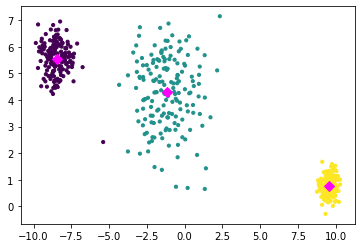

In [4]:
X_init = np.array([[-4,1,0.5],[0,-4,1.5]])# inital centroids
X,Y = kmeans(D,r,X_init)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(D[:, 0], D[:, 1], c=np.nonzero(Y)[1], s=10)
plt.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
plt.show()

## Initialization
The $k$-means problem is NP-hard. (SVD is polynomially solvable!) 
$k$-means poses a nonconvex optimization problem, and every feasible cluster indicator matrix and the corresponding centroids are one local minimum.
    
Hence, finding a good initialization is important! 

In [5]:
%matplotlib inline
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML
def animate(i):
    global X,D,Y
    ax.cla()
    if i==0: #initialize
        ax.scatter(D[:, 0], D[:, 1], s=10)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')  
    elif i%2==1: # update cluster assignments
        dist = np.sum(D**2,1).reshape(-1,1)  - 2* D@X + np.sum(X**2,0)
        closest_centroid = np.argmin(dist,1)
        Y = getY(closest_centroid)
        ax.scatter(D[:, 0], D[:, 1], c=closest_centroid, s=10)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
    else: # update centroids
        _,closest_centroid = np.nonzero(Y)
        ax.scatter(D[:, 0], D[:, 1], c=closest_centroid, s=10)
        X = update_centroid(D,Y)
        ax.scatter(X.T[:, 0], X.T[:, 1], c='magenta', s=50, marker = 'D')
    return

In [6]:
n=500
r =3
epsilon = 0.1
D, labels = datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 0.5, epsilon + 1.25, epsilon + 0.25],random_state=1)

In [7]:
fig = plt.figure()
ax = plt.axes()
X = np.array([[-4,1,0.5],[0,-4,1.5]])# inital centroids
Y=0
anim = animation.FuncAnimation(fig, animate, frames=8, interval=200, blit=False)
plt.close()
HTML(anim.to_jshtml())

In [8]:
fig = plt.figure()
ax = plt.axes()
X = np.random.rand(2,r)*10# inital centroids
Y=0
anim = animation.FuncAnimation(fig, animate, frames=8, interval=200, blit=False)
plt.close()
HTML(anim.to_jshtml())